In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
dataset = pd.read_csv("heart (3).csv")
print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
# select the input columns
x = dataset.iloc[:, [0, 4]].values
# print(x)

# select the output columns
y = dataset.iloc[:, -1].values
# print(y)


In [4]:
#splitting the dataset
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.2, random_state=0)


In [5]:
# train the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)


In [6]:
# evaluation metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[61 37]
 [32 75]]


In [7]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.6634146341463415


<ipython-input-8-6c0fb6628f73>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


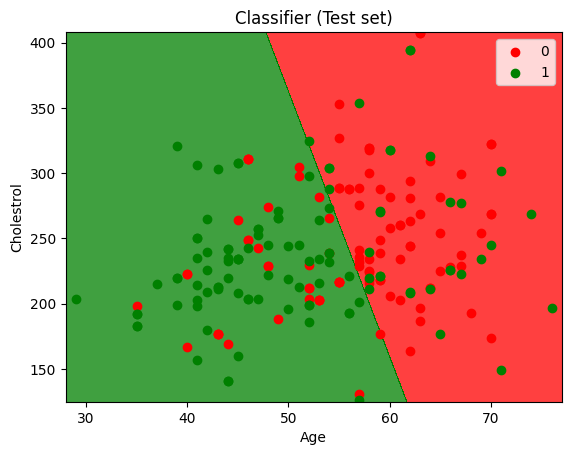

In [8]:
# visualize the results

from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()
